<a href="https://colab.research.google.com/github/Ruby124/Elective-2--Machine-Learning/blob/Elective-2-Machine-Learning/Casaberde_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import he libraries that you will need in EDA



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## 2. Load the data in a  dataframe

In [7]:
df = pd.read_csv("Housing.csv")
# To display the top 5 rows 
df.head(5) 

In [4]:
df.tail(5)                        
# To display the botton 5 rows

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


##3. Show the datasets and determine the number of rows and columns

In [17]:
print(df.head())
 
# obtaining the number of rows
print("number of rows : ", df.shape[0])
 
# obtaining the number of columns
print("number of columns : ", df.shape[1])

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

   parking prefarea furnishingstatus  
0        2      yes        furnished  
1        3       no        furnished  
2        2      yes   semi-furnished  
3        3      yes        furnished  
4        2       no        furnished  
number of rows :  545
number of columns :  11


##4. Checking the types of data

In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

##5. Drop the irrelevant  features like airconditioning , heat watering 

In [10]:
df = df.drop(['airconditioning', 'hotwaterheating'], axis=1)
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


##6. Rename the columns bedroom to BR,  stories to STR, mainroad to MR

In [24]:
df = df.rename(columns={"bedrooms": "BR", "stories": "STR", "mainroad": "MR" })
df.head(5)

,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


##7. Dropping the duplicate rows

In [25]:
df.shape

(545, 11)

In [37]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [39]:
df.count()      # Used to count the number of rows

price               545
area                545
BR                  545
bathrooms           545
STR                 545
MR                  545
guestroom           545
basement            545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [38]:
df = df.drop_duplicates()
df.head(5)

,price,area,BR,bathrooms,STR,MR,guestroom,basement,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,2,no,furnished


In [40]:
df.count

<bound method DataFrame.count of         price  area  BR  bathrooms  STR   MR guestroom basement  parking  \
0    13300000  7420   4          2    3  yes        no       no        2   
1    12250000  8960   4          4    4  yes        no       no        3   
2    12250000  9960   3          2    2  yes        no      yes        2   
3    12215000  7500   4          2    2  yes        no      yes        3   
4    11410000  7420   4          1    2  yes       yes      yes        2   
..        ...   ...  ..        ...  ...  ...       ...      ...      ...   
540   1820000  3000   2          1    1  yes        no      yes        2   
541   1767150  2400   3          1    1   no        no       no        0   
542   1750000  3620   2          1    1  yes        no       no        0   
543   1750000  2910   3          1    1   no        no       no        0   
544   1750000  3850   3          1    2  yes        no       no        0   

    prefarea furnishingstatus  
0        yes        fu

##8. Dropped missing values and show how many values has been dropped

In [76]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [30]:
df = df.dropna()    # Dropping the missing values.
df.count()

price               545
area                545
BR                  545
bathrooms           545
STR                 545
MR                  545
guestroom           545
basement            545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64

In [31]:
print(df.isnull().sum())   # After dropping the values

price               0
area                0
BR                  0
bathrooms           0
STR                 0
MR                  0
guestroom           0
basement            0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


##9. Detect outliers

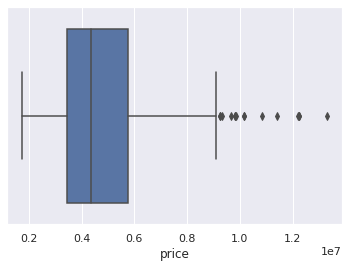

In [33]:
sns.boxplot(x=df['price'])

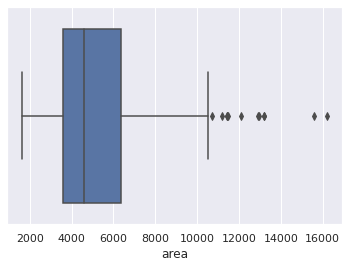

In [34]:
sns.boxplot(x=df['area'])

In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price        2310000.0
area            2760.0
BR                 1.0
bathrooms          1.0
STR                1.0
parking            1.0
dtype: float64


In [42]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(463, 11)

##10. Create a boxplot, scatter plot and histogram , heat map for visualization.

### Box plot

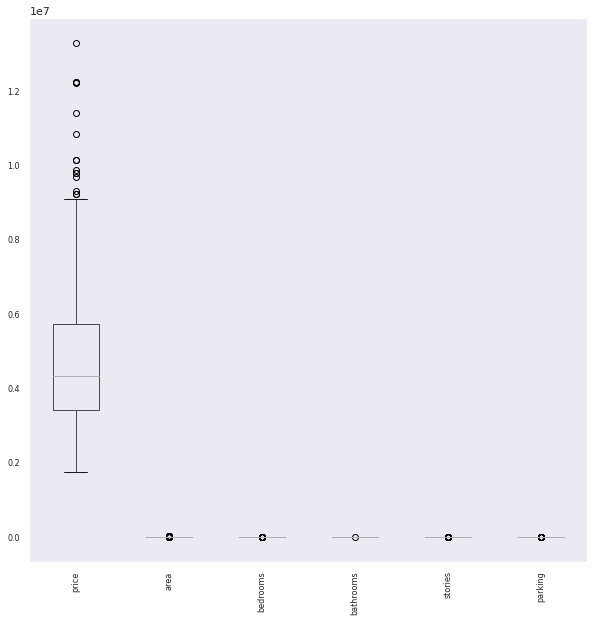

In [86]:

boxplot = df.boxplot(figsize = (10,10), rot = 90, fontsize= '8', grid = False)

###Scatter plot

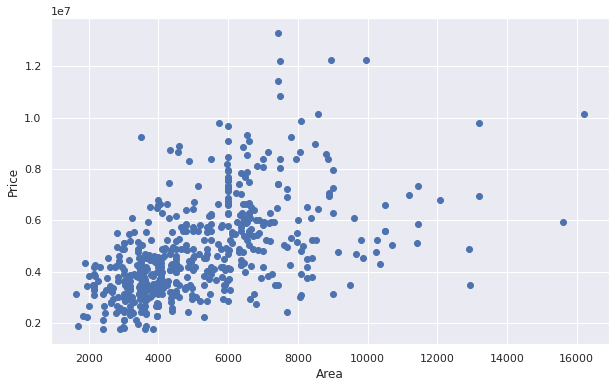

In [71]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['area'], df['price'])
ax.set_xlabel('Area')
ax.set_ylabel('Price')
plt.show()

### Histogram

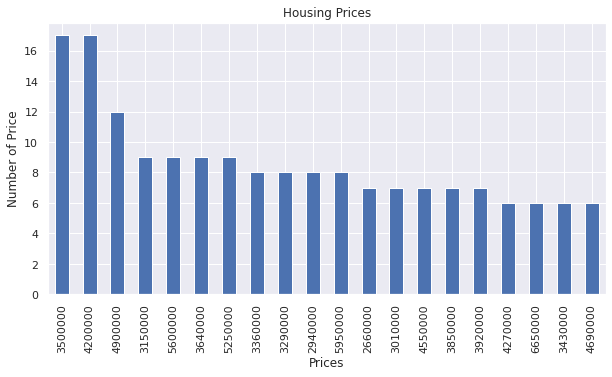

In [70]:
df.price.value_counts().nlargest(20).plot(kind='bar', figsize=(10,5))
plt.title("Housing Prices")
plt.ylabel('Number of Price')
plt.xlabel('Prices');

###Heat map

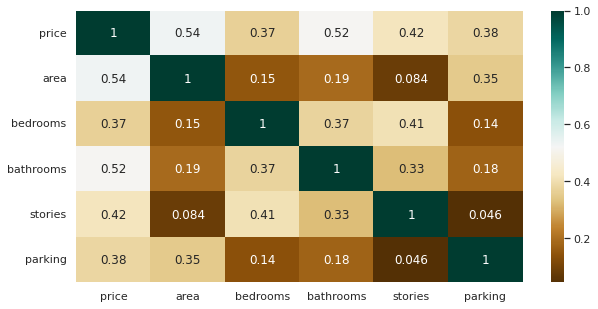

In [69]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True )